<a href="https://colab.research.google.com/github/ItsmeLikhithRajV/ML-project/blob/main/Hand_Written_Digit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand Written Digit Prediction - Classification Analysis**


# **Objective:**

> To classify handwritten digits (0-9) using the 8x8 grayscale pixel data and build a machine learning model to accurately predict the digit in a given image.

# **Data Source:**

> The dataset used is the Digits dataset from sklearn.datasets. It consists of 1797 images of handwritten digits, each represented as an 8x8 pixel array.









# **Import Libraries**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

# **Import Data**

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df=load_digits()

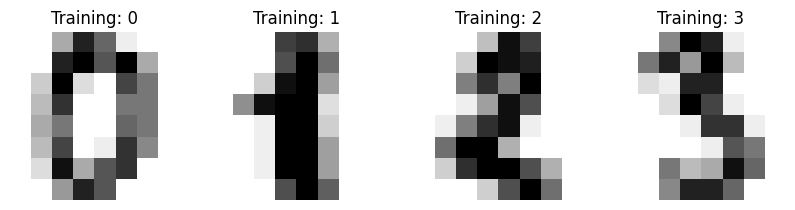

In [ ]:
_,axes=plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

# **Data Preprocessing**

> Flatten Image



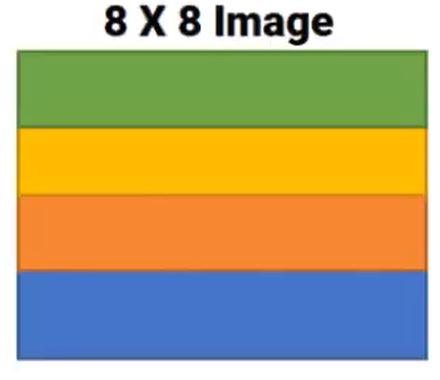






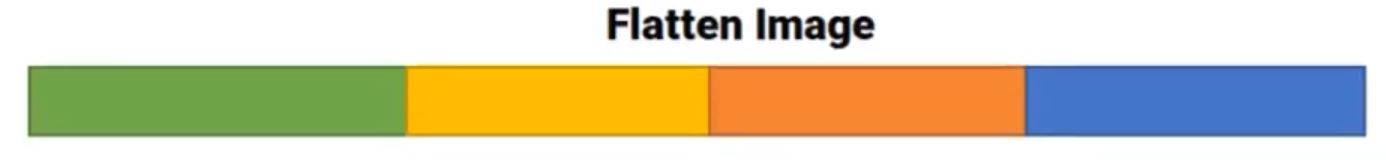


In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

# **Scaling Image Data**

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/10

In [ ]:
data.min()

0.0

In [ ]:
data.max()

1.6

In [ ]:
data[0]

array([0. , 0. , 0.5, 1.3, 0.9, 0.1, 0. , 0. , 0. , 0. , 1.3, 1.5, 1. ,
       1.5, 0.5, 0. , 0. , 0.3, 1.5, 0.2, 0. , 1.1, 0.8, 0. , 0. , 0.4,
       1.2, 0. , 0. , 0.8, 0.8, 0. , 0. , 0.5, 0.8, 0. , 0. , 0.9, 0.8,
       0. , 0. , 0.4, 1.1, 0. , 0.1, 1.2, 0.7, 0. , 0. , 0.2, 1.4, 0.5,
       1. , 1.2, 0. , 0. , 0. , 0. , 0.6, 1.3, 1. , 0. , 0. , 0. ])

# **Train Test Split Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(data, df.target, test_size=0.3)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cf=RandomForestClassifier()

In [ ]:
cf.fit(X_train,y_train)

RandomForestClassifier()

# **Predict Test Data**

In [ ]:
y_pred=cf.predict(X_test)

In [ ]:
y_pred

array([2, 0, 3, 4, 6, 3, 7, 9, 1, 4, 5, 2, 2, 0, 0, 9, 9, 3, 0, 5, 4, 5,
       8, 6, 0, 2, 3, 1, 3, 0, 4, 8, 5, 4, 5, 0, 2, 6, 4, 1, 7, 0, 8, 9,
       4, 9, 3, 7, 6, 1, 9, 8, 0, 1, 2, 2, 4, 7, 7, 4, 3, 8, 3, 0, 6, 4,
       1, 5, 2, 3, 8, 9, 9, 0, 5, 2, 7, 9, 4, 2, 9, 4, 0, 3, 4, 5, 2, 2,
       6, 4, 4, 9, 1, 6, 0, 0, 0, 8, 6, 6, 6, 4, 2, 0, 0, 0, 8, 8, 7, 7,
       5, 7, 0, 4, 0, 8, 9, 3, 5, 2, 9, 8, 3, 9, 0, 1, 3, 9, 9, 5, 9, 9,
       4, 7, 5, 7, 7, 8, 2, 7, 1, 7, 0, 0, 3, 4, 5, 1, 4, 3, 7, 7, 8, 8,
       7, 5, 3, 5, 8, 8, 9, 5, 7, 8, 8, 7, 0, 7, 7, 0, 8, 6, 8, 4, 7, 4,
       3, 1, 5, 5, 6, 4, 9, 0, 6, 5, 0, 5, 3, 5, 5, 7, 3, 1, 3, 2, 4, 5,
       4, 1, 7, 1, 8, 4, 8, 6, 6, 3, 1, 6, 6, 7, 4, 3, 6, 3, 0, 8, 1, 5,
       7, 5, 8, 0, 7, 1, 2, 7, 9, 4, 8, 5, 2, 7, 0, 4, 4, 3, 9, 5, 7, 6,
       9, 3, 5, 8, 2, 6, 6, 5, 6, 2, 6, 5, 8, 9, 1, 2, 8, 3, 1, 8, 7, 3,
       0, 4, 8, 0, 9, 2, 1, 3, 2, 6, 5, 6, 9, 3, 0, 2, 4, 2, 2, 6, 4, 2,
       2, 1, 9, 0, 6, 2, 1, 3, 9, 6, 6, 8, 4, 4, 8,

# **Model Accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 48,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 56,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 56,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 54,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 50,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 54]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.94      1.00      0.97        49
           2       1.00      1.00      1.00        48
           3       0.98      0.95      0.97        59
           4       1.00      1.00      1.00        56
           5       0.96      0.98      0.97        54
           6       1.00      1.00      1.00        54
           7       0.97      1.00      0.98        56
           8       0.98      0.96      0.97        52
           9       0.96      0.92      0.94        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# **Explanation**

> The Random Forest Classifier used in this project achieved an impressive accuracy of 98% on the test data, as seen from the classification report. The confusion matrix shows very few misclassifications, which indicates that the model has learned to distinguish between different digits very effectively.

# Key points from the evaluation:


1.   The precision, recall, and F1-scores for most classes (digits) are close to 1, which suggests that the model is highly reliable in predicting most digits accurately.
2.   Class 9 has a slightly lower F1-score (0.94) compared to other digits, indicating that there were a few more misclassifications for this digit. However, the model still performs very well overall.
3.   The confusion matrix shows that most predictions lie on the diagonal, which means the model correctly predicts the majority of the digits without confusion between different digits.






